In [81]:
##readme : download and run jupyter notebook 

In [82]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
%pylab inline 
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [83]:
df_msi = pd.read_csv("../Data/Figure4A_B_C_data.txt", sep = '\t')

In [85]:
summary_zygosity = pd.DataFrame({
        'count' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi.groupby(['zygosity', 'MSI_type'])['Patient_ID'].nunique()
    }).reset_index()

counts_zygosity = pd.DataFrame({
        'total' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi.groupby(['zygosity'])['Patient_ID'].nunique()
    }).reset_index()

summary_zygosity = pd.merge(summary_zygosity, counts_zygosity, on = 'zygosity', how = 'left')
#summary_zygosity['total'] = len(unique_pts_mmr['Patient_ID'].unique().tolist())
summary_zygosity['proportion'] = summary_zygosity['count']/summary_zygosity['total']
print summary_zygosity
summary_zygosity = summary_zygosity.pivot(index = 'zygosity', columns = 'MSI_type', values = 'proportion')
summary_zygosity = summary_zygosity.sort_index(ascending = False)
summary_zygosity

       zygosity MSI_type  count  total  proportion
0     Biallelic      MSI     64     80     0.80000
1     Biallelic      MSS     16     80     0.20000
2  Heterozygous      MSI      1     32     0.03125
3  Heterozygous      MSS     31     32     0.96875


MSI_type,MSI,MSS
zygosity,,
Heterozygous,0.03125,0.96875
Biallelic,0.80000,0.20000


In [86]:
#test heterozygous vs. biallelic
import scipy
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[64, 16], [1, 31]])
print oddsratio, pvalue

124.0 9.390923688328446e-15


Text(0.5,0,'')

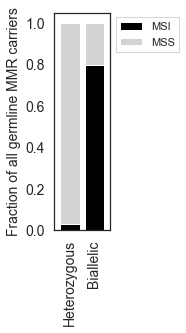

In [96]:
#fig 4 A
fig, ax = plt.subplots(figsize=(1, 4))
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.set(style="white")

colors = {'MSI': 'black', 'MSS': 'lightgrey'}

summary_zygosity.plot.bar(ax=ax, stacked=True, fontsize=14,width = 0.8,
                   color = [colors[i] for i in summary_zygosity.columns.tolist()] )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9), fancybox=False)
ax.set_ylabel("Fraction of all germline MMR carriers", fontsize=14)
ax.set_xlabel("", fontsize=18)

In [90]:
#tumor group column : 1 - Lynch associated, 2: secondary Lynch, 3: Unassociated, 4: exclude from analysis
dict_tumorgroup = {1:'Lynch-associated', 2:'Secondary Lynch', 3:'Non-Lynch'}

#exclude outlier heterozygous MSI case and tumor types to be excluded
df_msi_lineage = df_msi[df_msi['tumor_group']<4]
# df_msi_lineage = df_msi_lineage[~((df_msi_lineage['zygosity']=='Heterozygous') &
#                                (df_msi_lineage['MSI_type']=='MSI'))]
summary_lineage = pd.DataFrame({
        'count' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi_lineage.groupby(['tumor_group', 'zygosity', 'MSI_type'])['Patient_ID'].nunique()
    }).reset_index()

counts_tumorgroup = pd.DataFrame({
        'total' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi_lineage.groupby(['tumor_group'])['Patient_ID'].nunique()
    }).reset_index()

summary_lineage = pd.merge(summary_lineage, counts_tumorgroup, on = 'tumor_group', how = 'left')
summary_lineage['tumor_group'] = summary_lineage['tumor_group'].map(dict_tumorgroup)
summary_lineage['MSI_group'] = summary_lineage['zygosity']+", "+summary_lineage['MSI_type']
summary_lineage['proportion'] = summary_lineage['count']/summary_lineage['total']
summary_lineage

,tumor_group,zygosity,MSI_type,count,total,MSI_group,proportion
0,Lynch-associated,Biallelic,MSI,50,57,"Biallelic, MSI",0.877193
1,Lynch-associated,Biallelic,MSS,4,57,"Biallelic, MSS",0.070175
2,Lynch-associated,Heterozygous,MSI,1,57,"Heterozygous, MSI",0.017544
3,Lynch-associated,Heterozygous,MSS,2,57,"Heterozygous, MSS",0.035088
4,Secondary Lynch,Biallelic,MSI,11,29,"Biallelic, MSI",0.379310
5,Secondary Lynch,Biallelic,MSS,4,29,"Biallelic, MSS",0.137931
6,Secondary Lynch,Heterozygous,MSS,14,29,"Heterozygous, MSS",0.482759
7,Non-Lynch,Biallelic,MSS,5,17,"Biallelic, MSS",0.294118
8,Non-Lynch,Heterozygous,MSS,12,17,"Heterozygous, MSS",0.705882


In [91]:
# # run chisq trend test in R to test trend in lineage
# """
# MSI <- c(50, 11, 0)
# biallelic <- c(54, 15, 5)
# total <- c(57, 29, 17)
# score <- c(0,1,2)
# prop.trend.test(MSI, total, score)
# p-value = 2.522e-12
# """

Text(0.5,0,'')

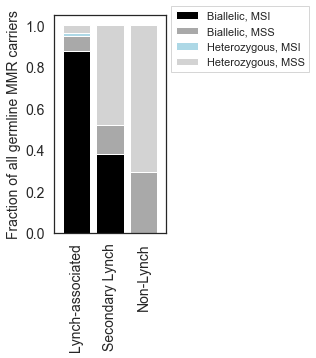

In [92]:
#Fig 4B
summary_lineage = summary_lineage.pivot(index = 'tumor_group', columns = 'MSI_group', values = 'proportion')

#set sort order correctly to 
inv_map = {v: k for k, v in dict_tumorgroup.iteritems()}
summary_lineage['order'] = summary_lineage.index.map(inv_map)
summary_lineage = summary_lineage.sort_values('order')
summary_lineage = summary_lineage.drop('order', axis = 1)

fig, ax = plt.subplots(figsize=(2, 4))
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.set(style="white")

colors = {'Biallelic, MSI': 'black', 'Biallelic, MSS': 'darkgrey', 'Heterozygous, MSS': 'lightgrey', 
          'Heterozygous, MSI': 'lightblue'}

summary_lineage.plot.bar(ax=ax, stacked=True, fontsize=14, width = 0.8,
                   color = [colors[i] for i in summary_lineage.columns.tolist()] )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.89), fancybox=False)
ax.set_ylabel("Fraction of all germline MMR carriers", fontsize=14)
ax.set_xlabel("", fontsize=18)

In [93]:
summary_gene = pd.DataFrame({
        'count' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi.groupby(['Hugo_Symbol', 'zygosity', 'MSI_type'])['Patient_ID'].nunique()
    }).reset_index()

counts_gene = pd.DataFrame({
        'total' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi.groupby(['Hugo_Symbol'])['Patient_ID'].nunique()
    }).reset_index()

summary_gene = pd.merge(summary_gene, counts_gene, on = 'Hugo_Symbol', how = 'left')

summary_all = pd.DataFrame({
        'count' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi.groupby(['zygosity', 'MSI_type'])['Patient_ID'].nunique()
    }).reset_index()

summary_all['Hugo_Symbol'] = 'All'
summary_all['total'] = df_msi.shape[0]
summary_all = summary_all[summary_gene.columns.tolist()]

summary_gene = pd.concat([summary_all, summary_gene])
summary_gene['MSI_group'] = summary_gene['zygosity']+", "+summary_gene['MSI_type']
summary_gene['proportion'] = summary_gene['count']/summary_gene['total']
summary_gene

,Hugo_Symbol,zygosity,MSI_type,count,total,MSI_group,proportion
0,All,Biallelic,MSI,64,112,"Biallelic, MSI",0.571429
1,All,Biallelic,MSS,16,112,"Biallelic, MSS",0.142857
2,All,Heterozygous,MSI,1,112,"Heterozygous, MSI",0.008929
3,All,Heterozygous,MSS,31,112,"Heterozygous, MSS",0.276786
0,MLH1,Biallelic,MSI,16,23,"Biallelic, MSI",0.695652
1,MLH1,Biallelic,MSS,4,23,"Biallelic, MSS",0.173913
2,MLH1,Heterozygous,MSI,1,23,"Heterozygous, MSI",0.043478
3,MLH1,Heterozygous,MSS,2,23,"Heterozygous, MSS",0.086957
4,MSH2,Biallelic,MSI,33,40,"Biallelic, MSI",0.825000
5,MSH2,Biallelic,MSS,5,40,"Biallelic, MSS",0.125000


Text(0.5,0,'')

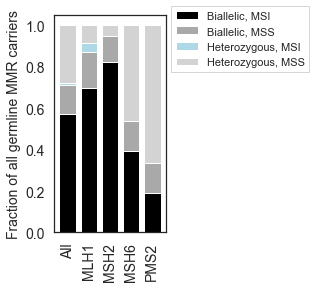

In [94]:
#fig 4C
summary_gene = summary_gene.pivot(index = 'Hugo_Symbol', columns = 'MSI_group', values = 'proportion')

fig, ax = plt.subplots(figsize=(2, 4))
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.set(style="white")

colors = {'Biallelic, MSI': 'black', 'Biallelic, MSS': 'darkgrey', 'Heterozygous, MSS': 'lightgrey', 
          'Heterozygous, MSI': 'lightblue'}

summary_gene.plot.bar(ax=ax, stacked=True, fontsize=14, width = 0.8,
                   color = [colors[i] for i in summary_gene.columns.tolist()] )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.89), fancybox=False)
ax.set_ylabel("Fraction of all germline MMR carriers", fontsize=14)
ax.set_xlabel("", fontsize=18)

In [95]:
#data to plot river plot in R
summary_gene = pd.DataFrame({
        'count' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi_lineage.groupby(['Hugo_Symbol', 'tumor_group'])['Patient_ID'].nunique()
    }).reset_index()

counts_gene = pd.DataFrame({
        'total' : #.groupby('day')['total_bill'].aggregate('mean').groupby(['cluster']).mean()
        df_msi_lineage.groupby(['Hugo_Symbol'])['Patient_ID'].nunique()
    }).reset_index()

summary_gene = pd.merge(summary_gene, counts_gene, on = 'Hugo_Symbol', how = 'left')
summary_gene['tumor_group'] = summary_gene['tumor_group'].map(dict_tumorgroup)
summary_gene['proportion'] = summary_gene['count']/summary_gene['total']
summary_gene


,Hugo_Symbol,tumor_group,count,total,proportion
0,MLH1,Lynch-associated,17,21,0.809524
1,MLH1,Secondary Lynch,2,21,0.095238
2,MLH1,Non-Lynch,2,21,0.095238
3,MSH2,Lynch-associated,25,36,0.694444
4,MSH2,Secondary Lynch,10,36,0.277778
5,MSH2,Non-Lynch,1,36,0.027778
6,MSH6,Lynch-associated,12,27,0.444444
7,MSH6,Secondary Lynch,7,27,0.259259
8,MSH6,Non-Lynch,8,27,0.296296
9,PMS2,Lynch-associated,3,19,0.157895
